# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

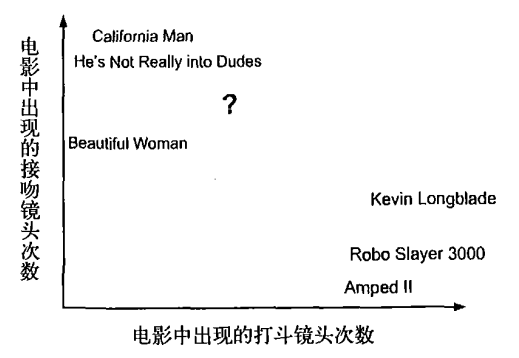

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

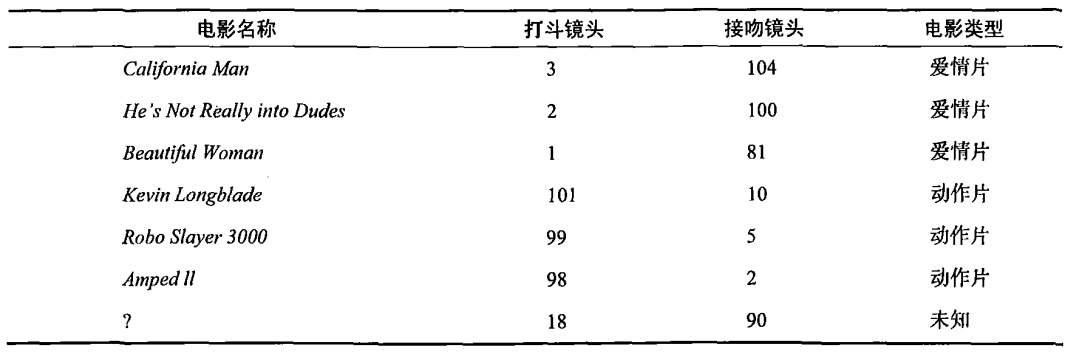

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

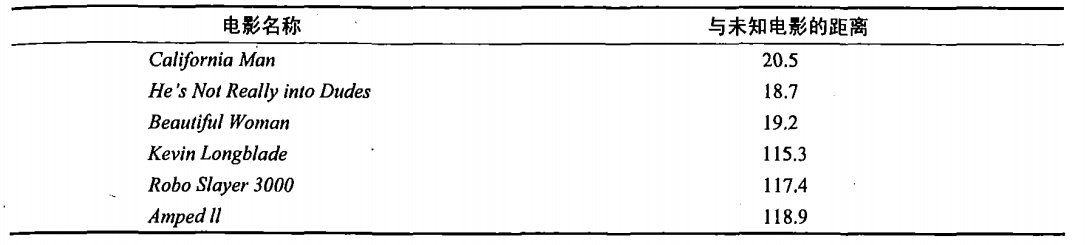

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

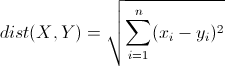

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [149]:
# 导包
from sklearn.neighbors import  KNeighborsClassifier

In [150]:
import numpy as np

In [151]:
# 首先要有训练数据
X_train = np.array([[180,80,43],[160,50,37],[175,70,42],[170,55,38],[160,60,40]])
Y_labels = np.array(['男','女','男','女','男'])
# 生成knn算法的实例
knn = KNeighborsClassifier()
# 训练
knn.fit(X_train,Y_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
# 预测
# 测试数据
x_test = np.array([[185,85,44]])
knn.predict(x_test)

array(['男'], dtype='<U1')

In [153]:
x_test1 = np.array([[155,45,35],[170,65,41],[165,70,38]])
knn.predict(x_test1)

array(['男', '男', '男'], dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [154]:
import sklearn.datasets as datasets

In [155]:
iris = datasets.load_iris()

获取训练样本

In [156]:
data = iris.data
target = iris.target

In [157]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [158]:
display(data.shape,target.shape)

(150, 4)

(150,)

In [159]:
# 导入一个数据拆分的包
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.1)

In [160]:
# 训练
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [161]:
# 预测
knn.predict(x_test)

array([1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0])

In [162]:
y_test

array([1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0])

In [163]:
knn.score(x_test,y_test)

1.0

In [164]:
knn.score(X_train,y_train)

0.9703703703703703

绘制图形

In [165]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [166]:
from pandas import DataFrame

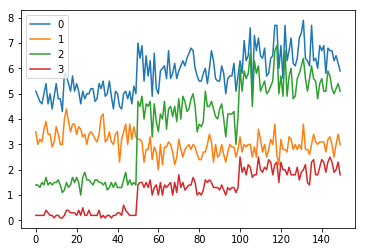

In [167]:
DataFrame(data).plot()

In [168]:
# 只要0 1两列稳定的列
data = data[:,:2]

In [169]:
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [170]:
knn = KNeighborsClassifier()

In [171]:
knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [172]:
# 画图
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

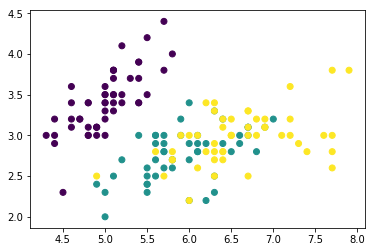

In [174]:
# 画散布图   观察点与点之间的关系
plt.scatter(data[:,0],data[:,1],c=target)

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [175]:
# 预测
# 自己生成预测数据
x = np.linspace(data[:,0].min(),data[:,0].max(),1000)
y = np.linspace(data[:,1].min(),data[:,1].max(),650)

X,Y = np.meshgrid(x,y)
display(X.shape,Y.shape)

(650, 1000)

(650, 1000)

对数据进行预测

In [176]:
c = np.array([[2,3,4],[-1,-4,-8]])
c_r = np.ravel(c)
c_r

array([ 2,  3,  4, -1, -4, -8])

In [177]:
# 将二维数组平展化
X_ravel = np.ravel(X)
Y_ravel = np.ravel(Y)
display(X_ravel.shape)

(650000,)

In [178]:
a = [1,2,-2,8,-1]
b = [3,4,9,3,14]
np.c_[a,b]

array([[ 1,  3],
       [ 2,  4],
       [-2,  9],
       [ 8,  3],
       [-1, 14]])

In [179]:
# 把x和y链接起来变成一个坐标
x_test = np.c_[X_ravel,Y_ravel]

In [180]:
x_test.shape

(650000, 2)

In [181]:
# 预测
y_test = knn.predict(x_test)

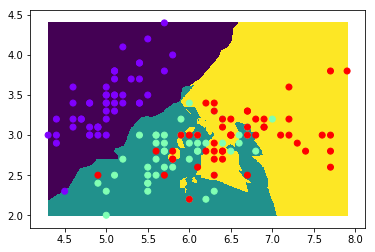

In [182]:
# 绘制背景图,所有的点  和颜色
plt.pcolormesh(X,Y,y_test.reshape(X.shape))
# 把点绘制上去
plt.scatter(data[:,0],data[:,1],c=target,cmap='rainbow')

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

In [183]:
# 线性回归的
from sklearn.neighbors import KNeighborsRegressor

生成样本数据

In [184]:
X_train = np.random.rand(80,1)*10
X_train

array([[4.48810907],
       [4.15628938],
       [3.98409673],
       [4.54586155],
       [9.75792733],
       [3.94429536],
       [2.92231554],
       [2.05551818],
       [3.43489255],
       [4.84747912],
       [4.56512594],
       [6.75269519],
       [1.89121239],
       [2.59410975],
       [1.39886109],
       [7.91619497],
       [2.56109029],
       [5.47565146],
       [0.48872223],
       [1.3762818 ],
       [7.86096915],
       [6.13748041],
       [2.99110624],
       [9.30066148],
       [0.89564903],
       [7.46535105],
       [0.37814223],
       [5.78015396],
       [9.31474587],
       [8.37354807],
       [0.5340229 ],
       [1.24798807],
       [9.50093138],
       [1.18500598],
       [4.70320255],
       [3.07450575],
       [4.23728112],
       [0.07964084],
       [9.15570902],
       [7.67020749],
       [9.50580587],
       [1.2207491 ],
       [2.20603189],
       [9.94505847],
       [9.50588611],
       [7.58419698],
       [9.49305223],
       [4.491

In [185]:
# 排序解释
n = np.array([[1,0.2],[0.8,2]])
display(n,np.sort(n,axis=1))

array([[1. , 0.2],
       [0.8, 2. ]])

array([[0.2, 1. ],
       [0.8, 2. ]])

In [186]:
# 排序解释
n = np.array([[1,0.2],[0.8,2]])
display(n,np.sort(n,axis=0))

array([[1. , 0.2],
       [0.8, 2. ]])

array([[0.8, 0.2],
       [1. , 2. ]])

In [187]:
# 排序
X_train = np.sort(X_train,axis=0)

In [188]:
y_train = np.sin(X_train)

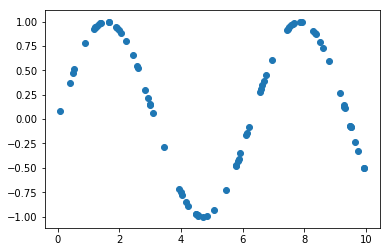

In [189]:
# 画图
plt.scatter(X_train,y_train)

In [190]:
# 给图片加噪点
y_train[::4,] = np.random.randn(20,1)*0.5

In [191]:
y_train.shape

(80, 1)

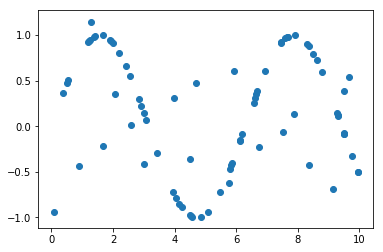

In [192]:
plt.scatter(X_train,y_train)

生成测试数据的结果

第一步：生成模型，并训练数据

In [193]:
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

第二步：使用模型，预测数据

In [194]:
#结果就是想要的函数

x_test = np.linspace(0,10,80).reshape((80,1))

y_ = knn_regressor.predict(x_test)

绘图显示数据

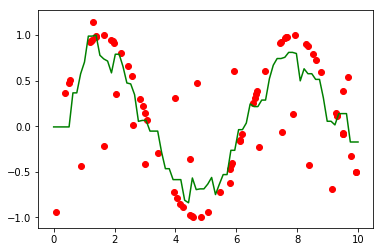

In [195]:
plt.scatter(X_train,y_train,c = 'r')

#预测出来函数，进行绘制
plt.plot(x_test,y_,'green')

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [196]:
X_train = np.load('./1-KNN/softpo/x_train.npy')
x_test = np.load('./1-KNN/softpo/x_test.npy')
y_train = np.load('./1-KNN/softpo/y_train.npy')
y_test = np.load('./1-KNN/softpo/y_test.npy')
display(X_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7352, 561)

(2947, 561)

(7352,)

(2947,)

获取数据

In [197]:
# 训练
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [198]:
knn.score(X_train,y_train)

0.9843579978237215

In [199]:
# 测试数据
knn.score(x_test,y_test)

0.9015948422124194

In [200]:
y_ = knn.predict(x_test)

In [201]:
# 对比一下
display(y_[:10],y_test[:10])

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 4], dtype=int64)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [202]:
from pandas import Series

In [203]:
s = Series(y_train)
s.unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

绘制

In [204]:
label = {1:'WALKING', 2:'WALKING UPSTAIRS', 
         3:'WALKING DOWNSTAIRS',4:'SITTING', 5:'STANDING', 6:'LAYING'}

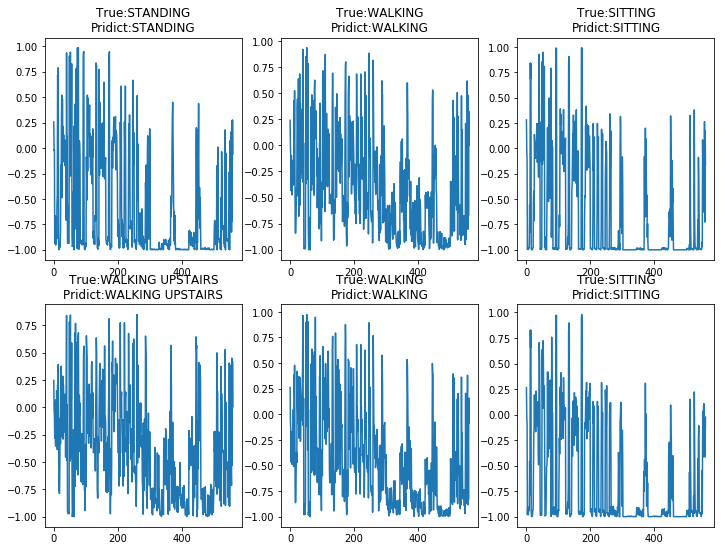

In [205]:
plt.figure(figsize=(12,9))
for i in range(6):
    axes = plt.subplot(2,3,i+1)
    # 隔100行取一条数据
    axes.plot(x_test[i*100])
    axes.set_title('True:%s\nPridict:%s' %(label[y_test[i*100]],  label[y_[i*100]]))

## 3、作业

#### 1、预测年收入是否大于50K美元

In [206]:
import pandas as pd
import numpy as np

In [207]:
from sklearn.neighbors import KNeighborsClassifier

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [208]:
salary = pd.read_csv('adults.txt')
display(salary.shape,salary.head())

(32561, 15)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [209]:
# 提取其中几列作为训练数据
data = salary[['age','education','occupation','race','sex','hours_per_week']].copy()
data.head()

,age,education,occupation,race,sex,hours_per_week
0,39,Bachelors,Adm-clerical,White,Male,40
1,50,Bachelors,Exec-managerial,White,Male,13
2,38,HS-grad,Handlers-cleaners,White,Male,40
3,53,11th,Handlers-cleaners,Black,Male,40
4,28,Bachelors,Prof-specialty,Black,Female,40


数据转换，将String类型数据转换为int

In [210]:
# 查看数据类型
data.dtypes

age                int64
education         object
occupation        object
race              object
sex               object
hours_per_week     int64
dtype: object

In [211]:
# 4列数据是String,Knn算范,没有办法计算距离
# 将数据映射成int
edu = data.education.unique()
occupation = data.occupation.unique()
race = data.race.unique()
sex = data.sex.unique()

In [212]:
# argwhere演示   返回索引
np.argwhere(edu == '11th')

array([[2]], dtype=int64)

In [213]:
def edu2int(item):
    # 返回arrray对应数据的索引
    # 找索引
    index = np.argwhere(edu == item)[0,0]
    return index

【知识点】map方法，进行数据转换

In [214]:
data['education'] = data['education'].map(edu2int)

In [215]:
data.head()

,age,education,occupation,race,sex,hours_per_week
0,39,0,Adm-clerical,White,Male,40
1,50,0,Exec-managerial,White,Male,13
2,38,1,Handlers-cleaners,White,Male,40
3,53,2,Handlers-cleaners,Black,Male,40
4,28,0,Prof-specialty,Black,Female,40


In [216]:
colums = ['occupation','race','sex']

In [217]:
data['occupation'] = data['occupation'].map(lambda x:np.argwhere(occupation == x)[0,0])
data['race'] = data['race'].map(lambda x:np.argwhere(race == x)[0,0])
data['sex'] = data['sex'].map(lambda x:np.argwhere(sex == x)[0,0])

In [218]:
data

,age,education,occupation,race,sex,hours_per_week
0,39,0,0,0,0,40
1,50,0,1,0,0,13
2,38,1,2,0,0,40
3,53,2,2,1,0,40
4,28,0,3,1,1,40
5,37,3,1,0,1,40
6,49,4,4,1,1,16
7,52,1,1,0,0,45
8,31,3,3,0,1,50
9,42,0,1,0,0,40


切片：训练数据和预测数据

In [219]:
y = salary['salary'].copy()

In [220]:
# 生成训练数据,取3W数据训练
X_train = data.loc[:30000]
x_test = data.loc[-3000:]

y_train = y.loc[:30000]
y_test = y.loc[-3000:]

生成算法

In [221]:
# 10是近邻值
knn = KNeighborsClassifier(20)

第一步：训练数据

In [222]:
display(type(X_train),type(y_train))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [223]:
# String 类型的数据
y_train

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14        >50K
15       <=50K
16       <=50K
17       <=50K
18       <=50K
19        >50K
20        >50K
21       <=50K
22       <=50K
23       <=50K
24       <=50K
25        >50K
26       <=50K
27        >50K
28       <=50K
29       <=50K
         ...  
29971     >50K
29972    <=50K
29973    <=50K
29974    <=50K
29975    <=50K
29976     >50K
29977     >50K
29978    <=50K
29979     >50K
29980    <=50K
29981     >50K
29982    <=50K
29983     >50K
29984    <=50K
29985    <=50K
29986    <=50K
29987    <=50K
29988    <=50K
29989     >50K
29990    <=50K
29991    <=50K
29992    <=50K
29993    <=50K
29994    <=50K
29995    <=50K
29996     >50K
29997    <=50K
29998    <=50K
29999    <=50K
30000    <=50K
Name: salary, Length: 30001, dtype: object

In [224]:
# knn对应的机器学习结果,可以是string类型,他不参与距离的欧氏运算
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

第二步：预测数据

In [225]:
# 随机生成预测数据
num = np.random.randint(0,3001,1)
y_ = knn.predict(x_test.iloc[num])
display(y_,y_test[num])

array(['<=50K'], dtype=object)

1422    <=50K
Name: salary, dtype: object

In [226]:
knn.score(x_test,y_test)

0.8039986486901508

保存训练模型  
from sklearn.externals import joblib

In [227]:
from sklearn.externals import joblib

In [229]:
# 将训练模型保存下来
# 参数1,训练模型,
# 参数2,文件名
joblib.dump(knn,'50k_knn.m')

['50k_knn.m']

In [230]:
# 将保存好的knn加载下来
knn_50k = joblib.load('50k_knn.m')

In [231]:
knn_50k.score(x_test,y_test)

0.8039986486901508

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度